In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-methodlines-heatFE)

Let's implement the method of {numref}`Example {number} <example-methodlines-heatFE>` with second-order space semidiscretization.

In [2]:
m = 100
x, Dx, Dxx = FNC.diffper(m, [0, 1]);
tfinal = 0.15 
n = 2400           # number of time steps
τ = tfinal / n     # time step    
t = τ * (0:n)      # time values

0.0:6.25e-5:0.15

Next we set an initial condition. It isn't mathematically periodic, but the end values and derivatives are so small that for numerical purposes it may as well be.

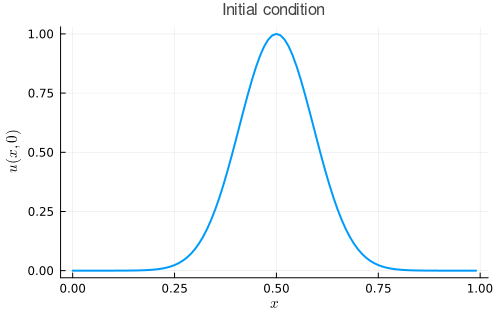

In [3]:
U = zeros(m, n+1);
U[:, 1] = @. exp( -60 * (x - 0.5)^2 )
plot(x, U[:, 1];
    xaxis=(L"x"),  yaxis=(L"u(x,0)"),
    title="Initial condition")

The Euler time stepping simply multiplies $\mathbf{u}_j$ by the constant matrix in {eq}`Eulerxx` at each time step. Since that matrix is sparse, we will declare it as such, even though the run-time savings may not be detectable for this small value of $m$.

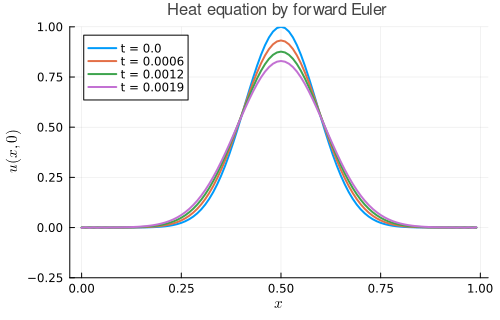

In [4]:
using SparseArrays
A = sparse(I + τ * Dxx)
for j in 1:n
    U[:, j+1] = A * U[:, j]
end

plot_idx = 1:10:31
plot_times = round.(t[plot_idx], digits=4)
labels = ["t = $t" for t in plot_times]
plot(x, U[:, plot_idx];
    label=reshape(labels, 1, :),  legend=:topleft,  
    title="Heat equation by forward Euler",
    xaxis=(L"x"),  yaxis=(L"u(x,0)", [-0.25, 1]))

Things seem to start well, with the initial peak widening and shrinking. But then there is a nonphysical growth in the solution.

In [5]:
anim = @animate for j in 1:101
    plot(x, U[:, j];
    label=@sprintf("t=%.5f", t[j]),
    xaxis=(L"x"),  yaxis=(L"u(x,t)", [-1, 2]),
    dpi=150,  title="Heat equation by forward Euler")
end
mp4(anim, "diffusionFE.mp4")

[ Info: Saved animation to /Users/driscoll/Dropbox/Mac/Documents/GitHub/fnc-notebooks/chapter11/section2/julia/diffusionFE.mp4


Plots.AnimatedGif("/Users/driscoll/Dropbox/Mac/Documents/GitHub/fnc-notebooks/chapter11/section2/julia/diffusionFE.mp4")

The growth in norm is exponential in time.

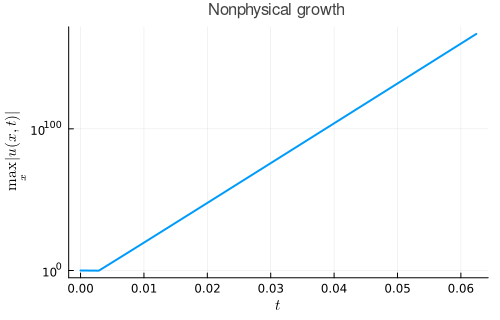

In [6]:
M = vec( maximum(abs, U, dims=1) )   
plot(t[1:1000], M[1:1000];
    xaxis=(L"t"),  yaxis=(:log10, L"\max_x |u(x,t)|"),
    title="Nonphysical growth") 